In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

In [3]:
df=pd.read_csv("C:\\Users\\S.sidharth\\Desktop\\heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
class logistic_regression:
    
    def __init__(self,iterations,alpha):
        self.iterations=iterations  #choosing the number of iterations (Hyperparameter)
        self.alpha=alpha       #choosing alpha(Hyperparameter) 
    
    def sigmoid(self,z):
        return(1/(1+np.exp(-z)))    #sigmoid (Link Fucntion)
    
    def fit(self,x,y):              #(X-data for training, y - Output) 
        m=x.shape[0]                
        self.w=np.random.randn(x.shape[1],1)  #Initializing the weight
        
        cost_vals=[] 
        for i in range(2):     #For each number of iterations
            a= np.dot(x,self.w)            #multiplying the weights with the Feature values and summing them up
            z=self.sigmoid(a)         #Using link function to transform the data
            
            cost = (-1/m) *( np.dot(y,np.log(z))+(np.dot((1-y),np.log(1-z))))  #Calculating the cost function
            
            cost_vals.append(cost)        #Creating a list with all cost values for each iteration
            
            dw = np.dot(x.T,z-np.array([y])).mean()  #Calculating the gradient
            
            self.w=self.w-(self.alpha*dw)         #updating the weights
            #print(self.w.shape)
        return self
    
    def predict(self,x,threshold):
        probability=self.sigmoid(np.dot(x,self.w))  #predicting a new set of values based on the training 
        
        if(probability>threshold):
            return (1)
        else:
            return (0)
        

In [5]:
idx1 = np.where(df['target']==1)
idx0 = np.where(df['target']==0)

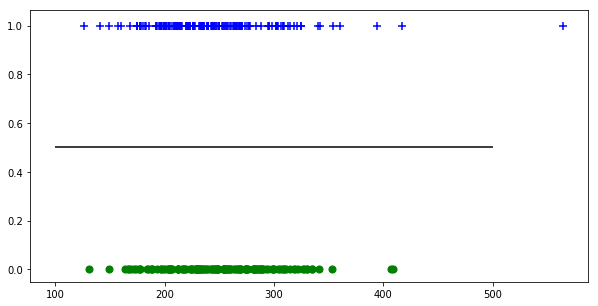

In [21]:
fig,ax1=plt.subplots(1,1,figsize=(10,5))
ax1.scatter(df.iloc[idx1]['chol'],df.iloc[idx1]['target'],s=50,c='b',marker='+',label='One class')
ax1.scatter(df.iloc[idx0]['chol'],df.iloc[idx0]['target'],s=50,c='g',marker='o',label="Second Class")
plt.hlines(y=0.5,xmin=100,xmax=500)

In [6]:
obj=logistic_regression(1000,0.001)

In [7]:
ll=obj.fit(df[['trestbps','chol']],df['target'])

C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


In [8]:
ll.predict([[223,145]],0.5)

1

In [9]:
#scikit-learn implementation

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df[['trestbps','chol']],df['target'])

In [11]:
clf=LogisticRegression()

In [12]:
clf.fit(x_train,y_train)

C:\Users\S.sidharth\Miniconda3\envs\final_proj\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred=clf.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.5394736842105263

In [15]:
clf.score(x_train,y_train)

0.5947136563876652

In [16]:
clf.score(x_test,y_test)

0.5394736842105263

In [17]:
confusion_matrix(y_test,y_pred)

array([[ 6, 30],
       [ 5, 35]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.17      0.26        36
           1       0.54      0.88      0.67        40

   micro avg       0.54      0.54      0.54        76
   macro avg       0.54      0.52      0.46        76
weighted avg       0.54      0.54      0.47        76

